### 1. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, RepeatedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, r2_score, mean_squared_error, explained_variance_score, mean_absolute_error, r2_score

In [ ]:
from analysis.analyzer import TTTH_Analyzer
_analyzer = TTTH_Analyzer()

In [ ]:
from time import time

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### 2. Regression

In [ ]:
df = pd.read_csv('ds_salaries.csv', index_col=0)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [ ]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
# khong co du lieu null

In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [ ]:
df_output = df[['salary_in_usd']]
df_input = df.drop(['salary_in_usd'], axis=1)

In [ ]:
df_input_category = df_input.select_dtypes('object')
df_input_numeric = df_input.select_dtypes(['int','float'])

In [ ]:
df_input_category.head()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,MI,FT,Data Scientist,EUR,DE,DE,L
1,SE,FT,Machine Learning Scientist,USD,JP,JP,S
2,SE,FT,Big Data Engineer,GBP,GB,GB,M
3,MI,FT,Product Data Analyst,USD,HN,HN,S
4,SE,FT,Machine Learning Engineer,USD,US,US,L


In [ ]:
df_input_numeric.head()

,work_year,salary,remote_ratio
0,2020,70000,0
1,2020,260000,0
2,2020,85000,50
3,2020,20000,0
4,2020,150000,50


#### 1. Univariate analysis

Class count of experience_level:

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64


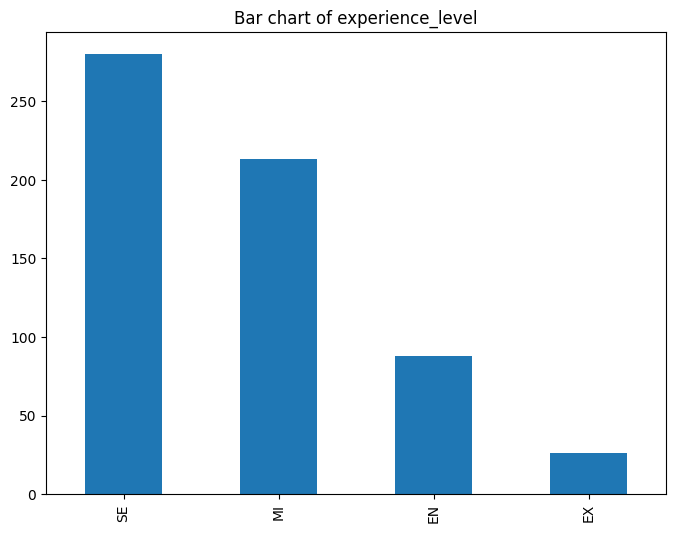

Class count of employment_type:

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64


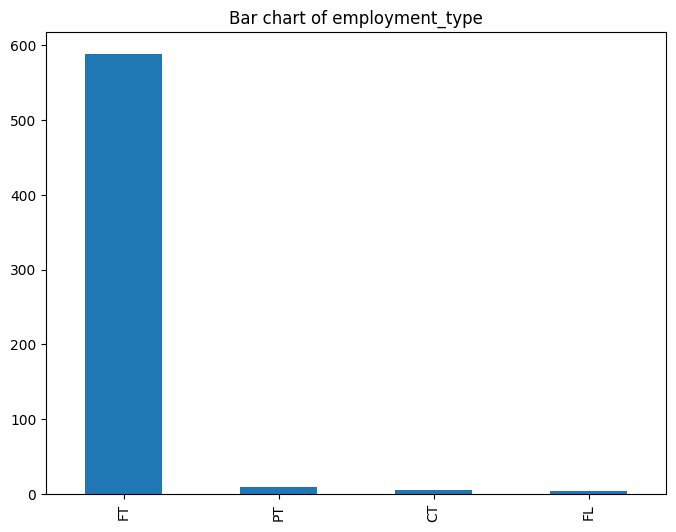

Class count of job_title:

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data 

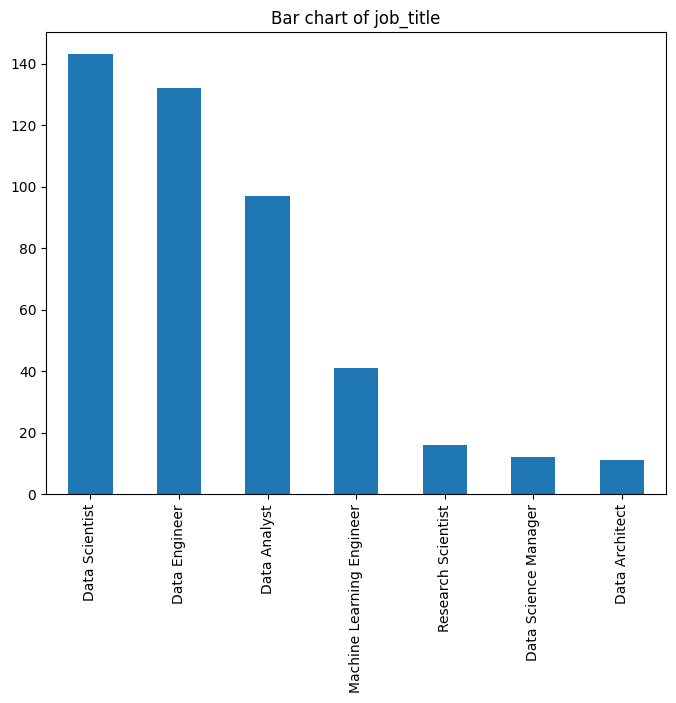

Class count of salary_currency:

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64


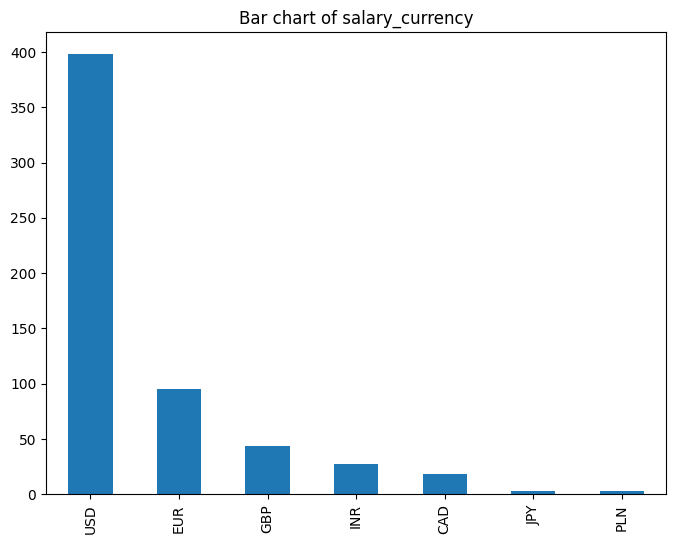

Class count of employee_residence:

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64


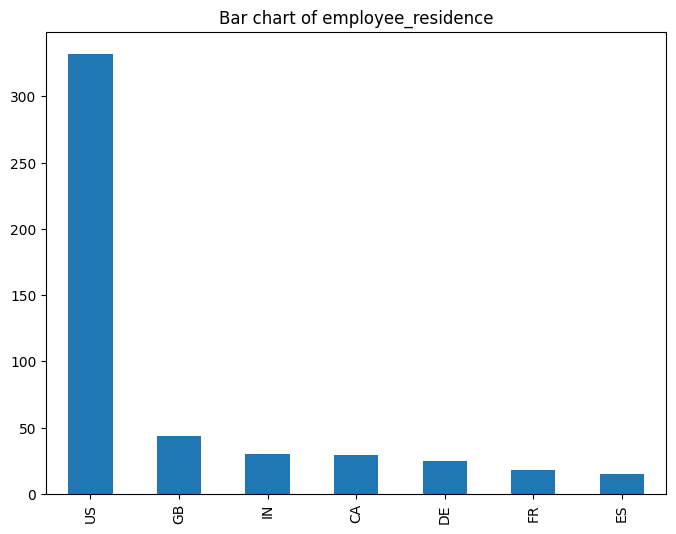

Class count of company_location:

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64


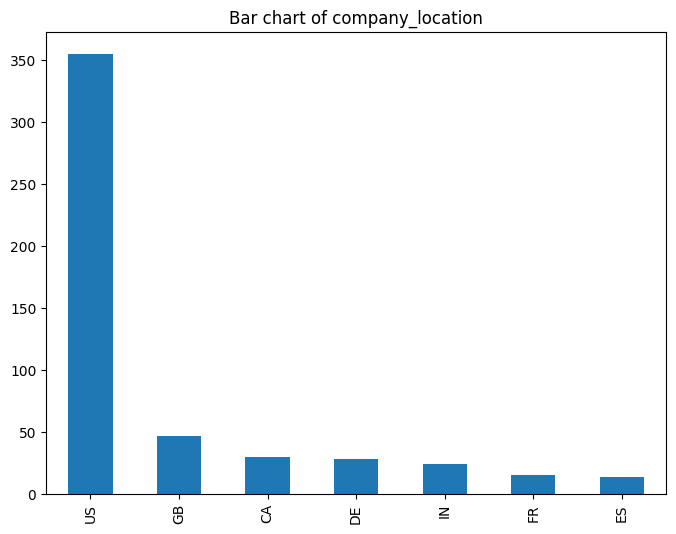

Class count of company_size:

M    326
L    198
S     83
Name: company_size, dtype: int64


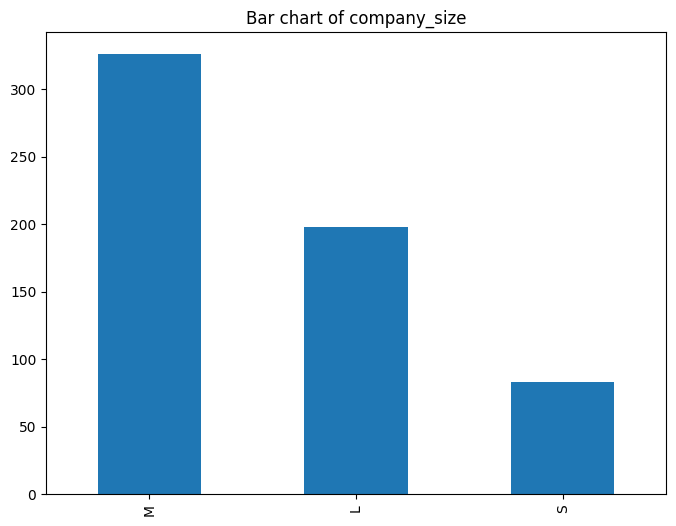

In [ ]:
for i in df_input_category.columns.to_list():
    _analyzer.analyze_category_variable(i, df_input_category)

=====
central tendency of work_year: {'mean': 2021.4052718286655, 'median': 2022.0, 'mode': 2022, 'min': 2020, 'max': 2022, 'range': 2}
=====
Dispersion of work_year: 
 {'range': 2, 'q1': 2021.0, 'q3': 2022.0, 'iqr': 1.0, 'var': 0.479048069551601, 'skew': -0.7358170021726341, 'kurtosis': -0.644360416347395}
=====


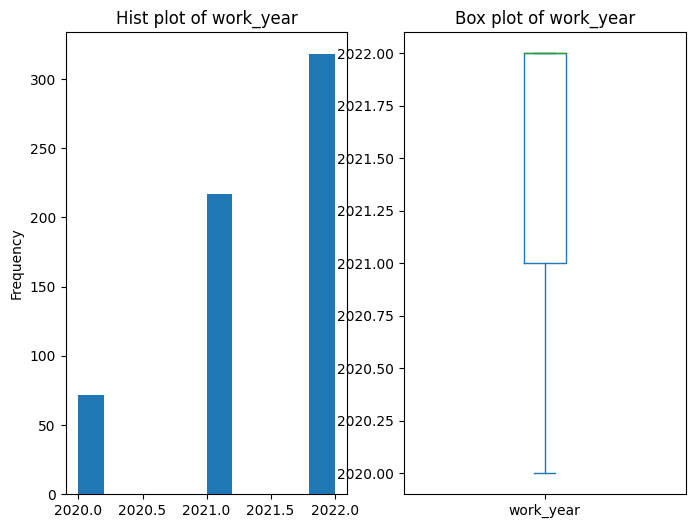

=====
central tendency of salary: {'mean': 324000.0626029654, 'median': 115000.0, 'mode': 80000, 'min': 4000, 'max': 30400000, 'range': 30396000}
=====
Dispersion of salary: 
 {'range': 30396000, 'q1': 70000.0, 'q3': 165000.0, 'iqr': 95000.0, 'var': 2385040046528.2007, 'skew': 14.052915442625148, 'kurtosis': 247.42603923016264}
=====


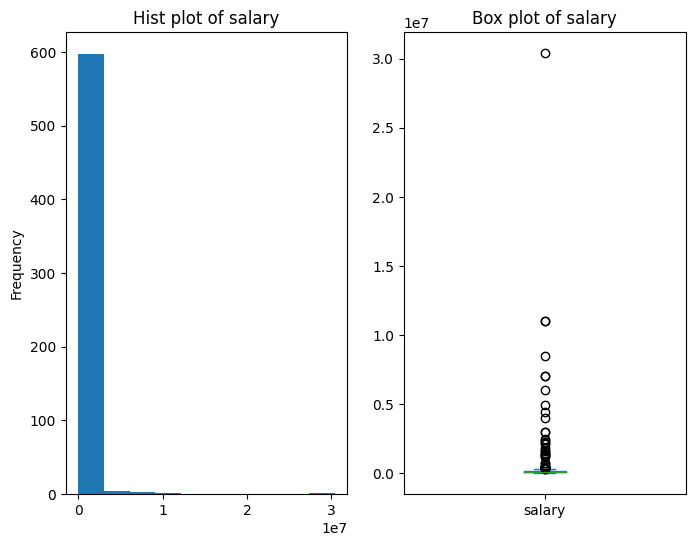

=====
central tendency of remote_ratio: {'mean': 70.92257001647447, 'median': 100.0, 'mode': 100, 'min': 0, 'max': 100, 'range': 100}
=====
Dispersion of remote_ratio: 
 {'range': 100, 'q1': 50.0, 'q3': 100.0, 'iqr': 50.0, 'var': 1657.2332686316408, 'skew': -0.9042240790570993, 'kurtosis': -0.8882691132267393}
=====


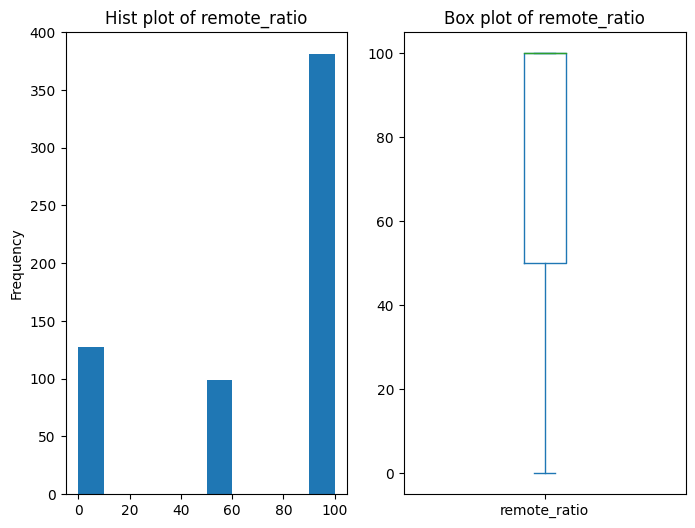

In [ ]:
for i in df_input_numeric.columns.to_list():
    _analyzer.analyze_numeric_variable(i, df_input_numeric)

=====
central tendency of salary_in_usd: {'mean': 112297.86985172982, 'median': 101570.0, 'mode': 100000, 'min': 2859, 'max': 600000, 'range': 597141}
=====
Dispersion of salary_in_usd: 
 {'range': 597141, 'q1': 62726.0, 'q3': 150000.0, 'iqr': 87274.0, 'var': 5034932663.176102, 'skew': 1.667544954563863, 'kurtosis': 6.353794741063377}
=====


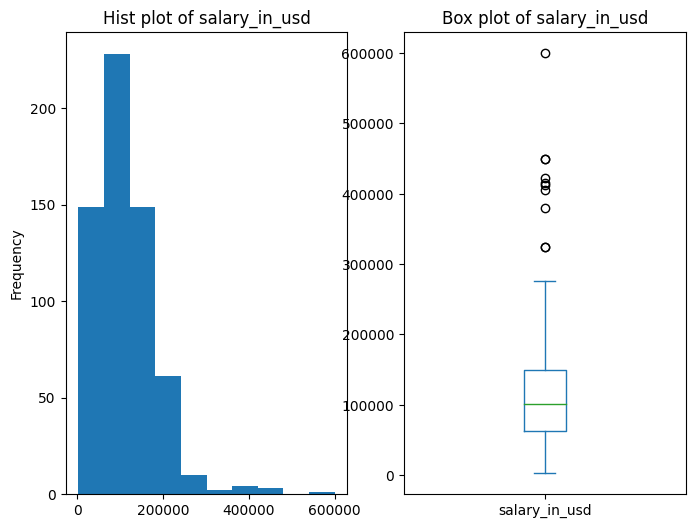

In [ ]:
_analyzer.analyze_numeric_variable('salary_in_usd', df_output)

In [ ]:
# nhan xet: co ton tai mot so outlier, nhung ta khong loai bo, do no thuoc output

In [ ]:
df_input_numeric.corr()

,work_year,salary,remote_ratio
work_year,1.000000,-0.087577,0.076314
salary,-0.087577,1.000000,-0.014608
remote_ratio,0.076314,-0.014608,1.000000


#### 2. Bivariant analysis

##### Input category vs input category

In [ ]:
unique_pair_category = _analyzer.create_unique_pair_variable(df_input_category.columns)
unique_pair_category

[{'employment_type', 'experience_level'},
 {'experience_level', 'job_title'},
 {'experience_level', 'salary_currency'},
 {'employee_residence', 'experience_level'},
 {'company_location', 'experience_level'},
 {'company_size', 'experience_level'},
 {'employment_type', 'job_title'},
 {'employment_type', 'salary_currency'},
 {'employee_residence', 'employment_type'},
 {'company_location', 'employment_type'},
 {'company_size', 'employment_type'},
 {'job_title', 'salary_currency'},
 {'employee_residence', 'job_title'},
 {'company_location', 'job_title'},
 {'company_size', 'job_title'},
 {'employee_residence', 'salary_currency'},
 {'company_location', 'salary_currency'},
 {'company_size', 'salary_currency'},
 {'company_location', 'employee_residence'},
 {'company_size', 'employee_residence'},
 {'company_location', 'company_size'}]

=====Analyze of employment_type and experience_level=====


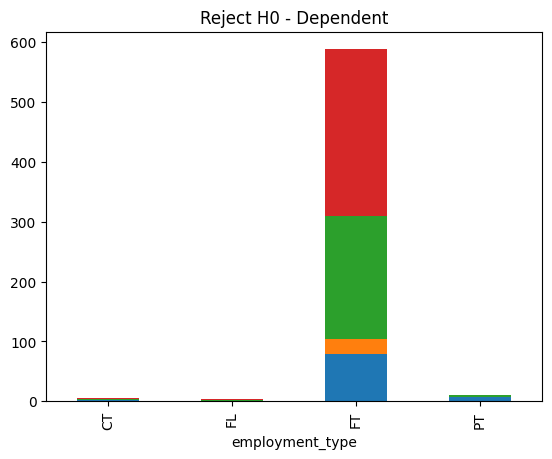

{'var1': 'employment_type', 'var2': 'experience_level', 'result': 'Reject H0 - Dependent'}
=====Analyze of job_title and experience_level=====


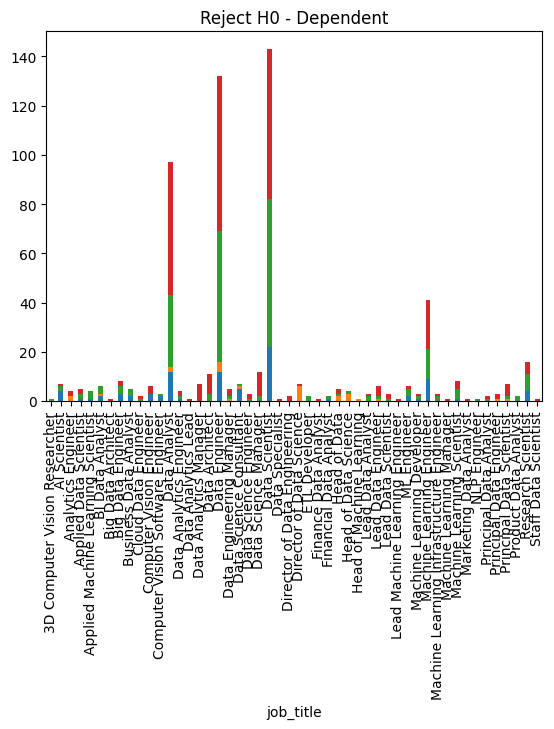

{'var1': 'job_title', 'var2': 'experience_level', 'result': 'Reject H0 - Dependent'}
=====Analyze of experience_level and salary_currency=====


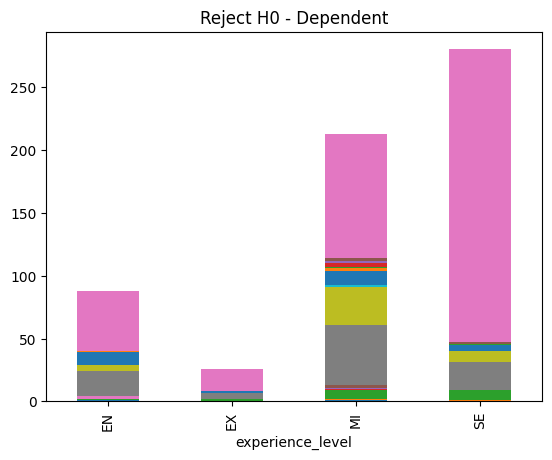

{'var1': 'experience_level', 'var2': 'salary_currency', 'result': 'Reject H0 - Dependent'}
=====Analyze of experience_level and employee_residence=====


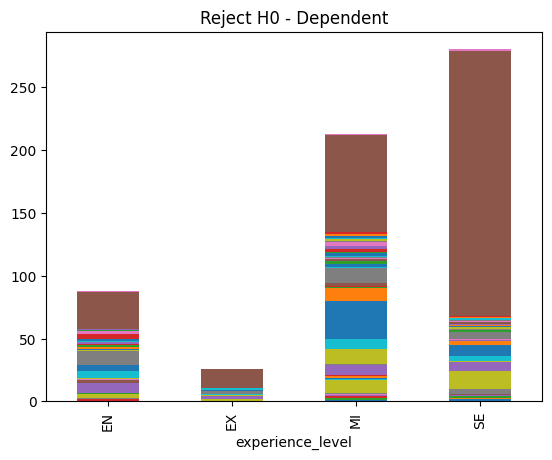

{'var1': 'experience_level', 'var2': 'employee_residence', 'result': 'Reject H0 - Dependent'}
=====Analyze of company_location and experience_level=====


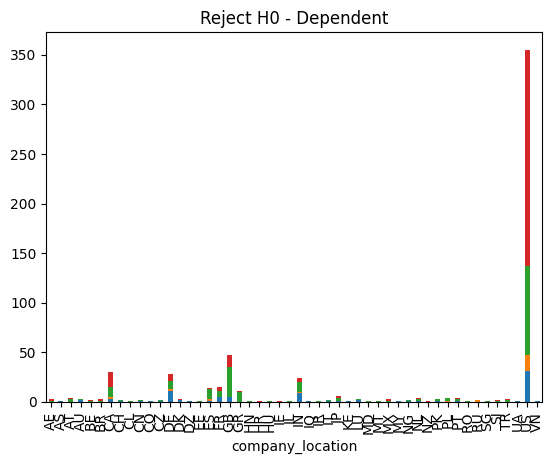

{'var1': 'company_location', 'var2': 'experience_level', 'result': 'Reject H0 - Dependent'}
=====Analyze of company_size and experience_level=====


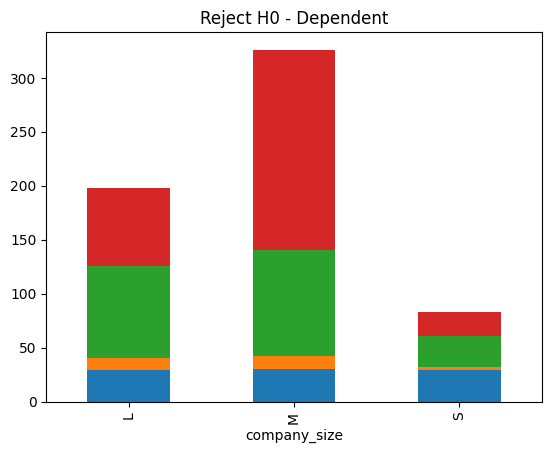

{'var1': 'company_size', 'var2': 'experience_level', 'result': 'Reject H0 - Dependent'}
=====Analyze of job_title and employment_type=====


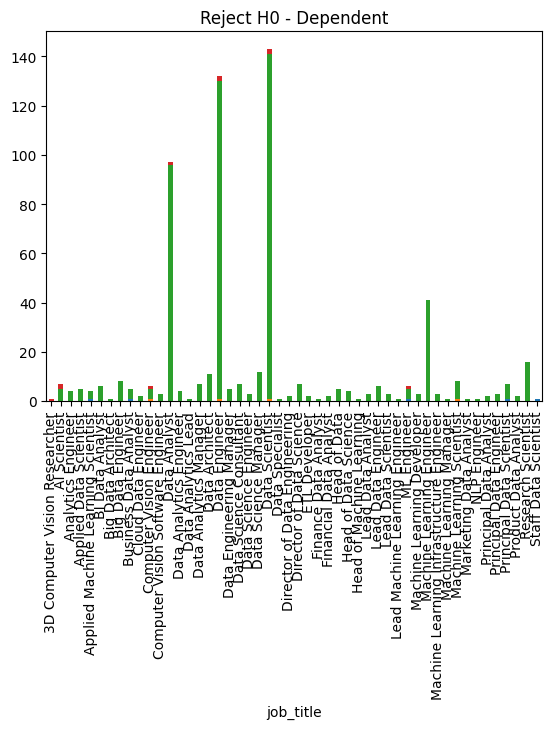

{'var1': 'job_title', 'var2': 'employment_type', 'result': 'Reject H0 - Dependent'}
=====Analyze of employment_type and salary_currency=====


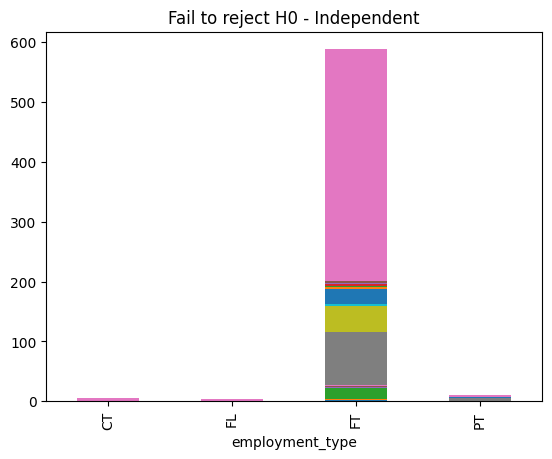

{'var1': 'employment_type', 'var2': 'salary_currency', 'result': 'Fail to reject H0 - Independent'}
=====Analyze of employment_type and employee_residence=====


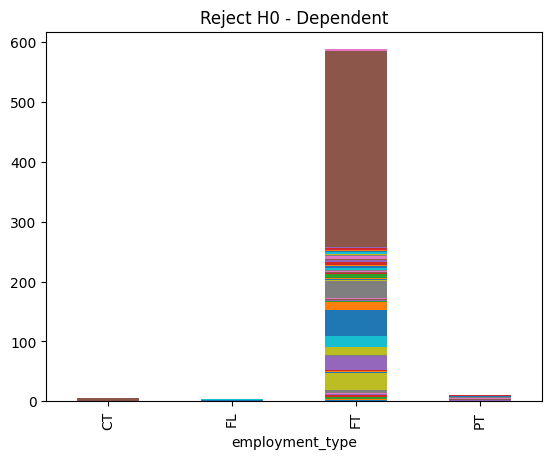

{'var1': 'employment_type', 'var2': 'employee_residence', 'result': 'Reject H0 - Dependent'}
=====Analyze of company_location and employment_type=====


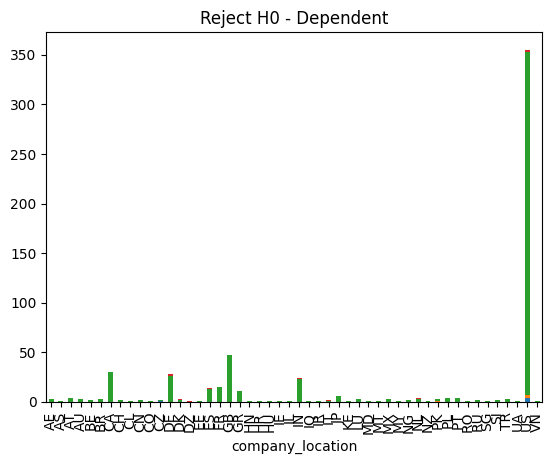

{'var1': 'company_location', 'var2': 'employment_type', 'result': 'Reject H0 - Dependent'}
=====Analyze of company_size and employment_type=====


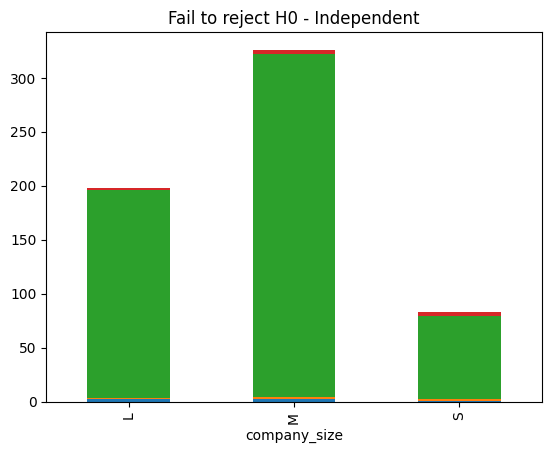

{'var1': 'company_size', 'var2': 'employment_type', 'result': 'Fail to reject H0 - Independent'}
=====Analyze of job_title and salary_currency=====


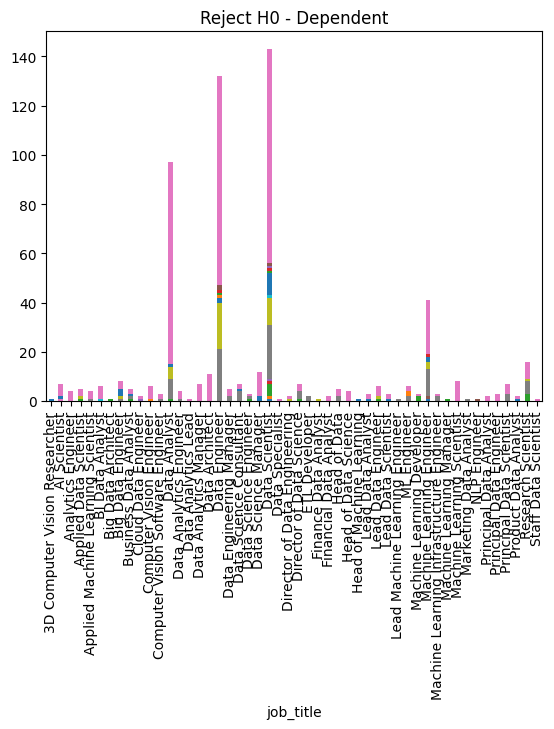

{'var1': 'job_title', 'var2': 'salary_currency', 'result': 'Reject H0 - Dependent'}
=====Analyze of job_title and employee_residence=====


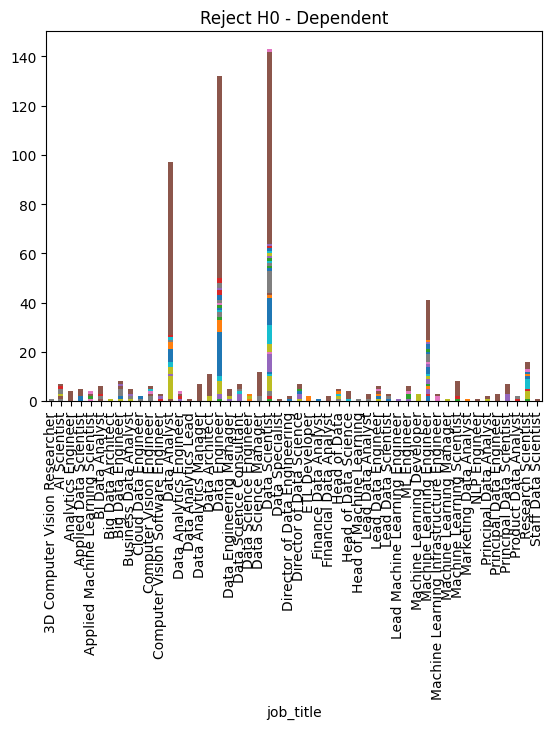

{'var1': 'job_title', 'var2': 'employee_residence', 'result': 'Reject H0 - Dependent'}
=====Analyze of job_title and company_location=====


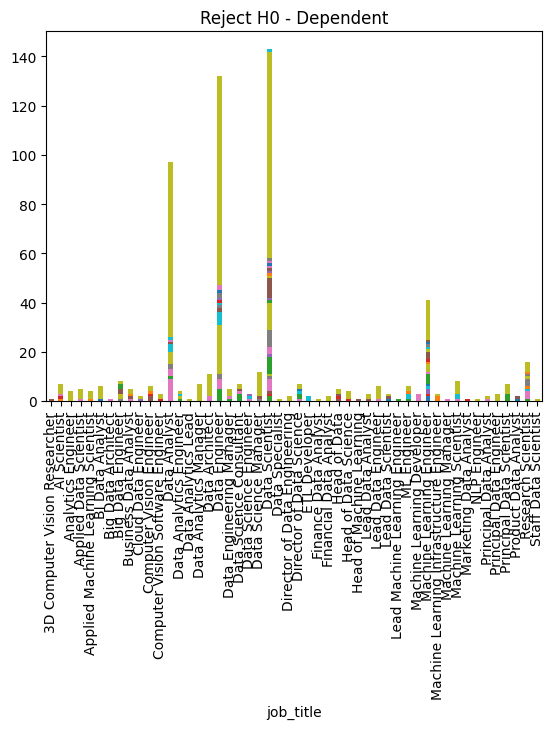

{'var1': 'job_title', 'var2': 'company_location', 'result': 'Reject H0 - Dependent'}
=====Analyze of job_title and company_size=====


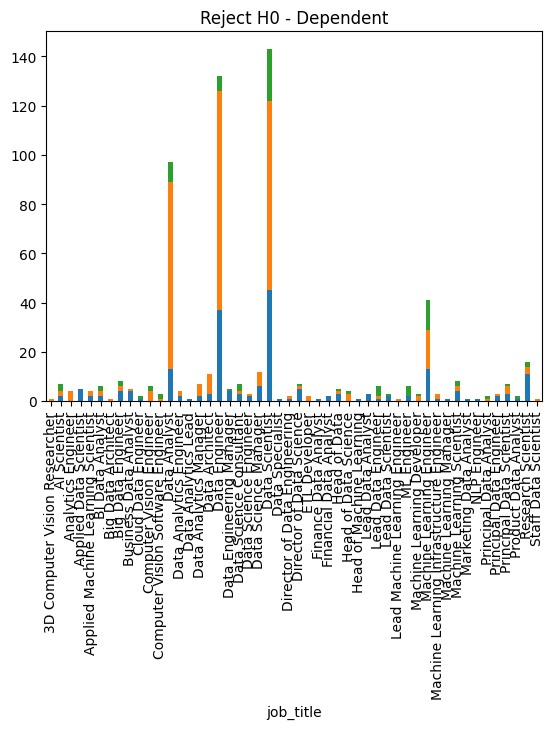

{'var1': 'job_title', 'var2': 'company_size', 'result': 'Reject H0 - Dependent'}
=====Analyze of employee_residence and salary_currency=====


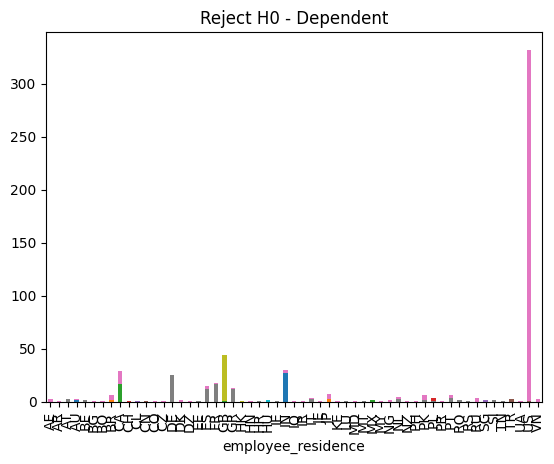

{'var1': 'employee_residence', 'var2': 'salary_currency', 'result': 'Reject H0 - Dependent'}
=====Analyze of company_location and salary_currency=====


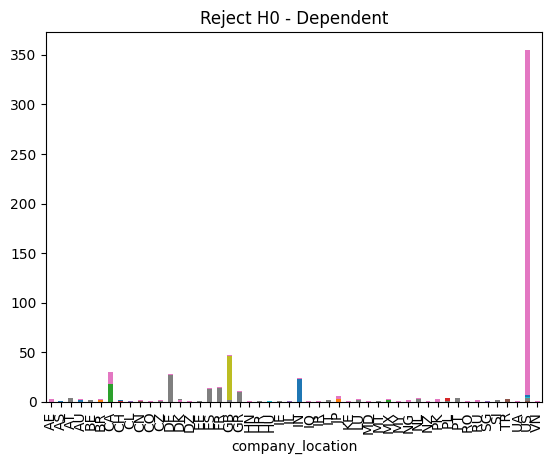

{'var1': 'company_location', 'var2': 'salary_currency', 'result': 'Reject H0 - Dependent'}
=====Analyze of company_size and salary_currency=====


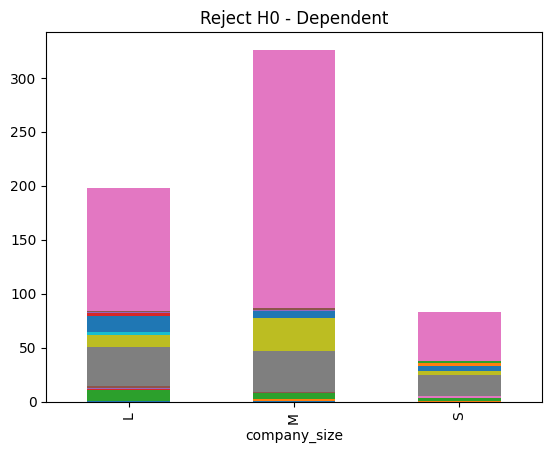

{'var1': 'company_size', 'var2': 'salary_currency', 'result': 'Reject H0 - Dependent'}
=====Analyze of company_location and employee_residence=====


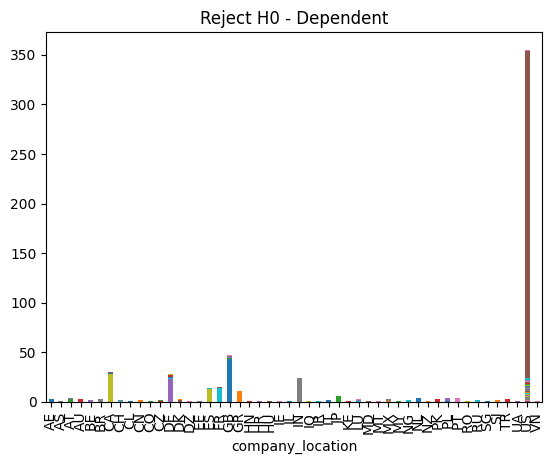

{'var1': 'company_location', 'var2': 'employee_residence', 'result': 'Reject H0 - Dependent'}
=====Analyze of company_size and employee_residence=====


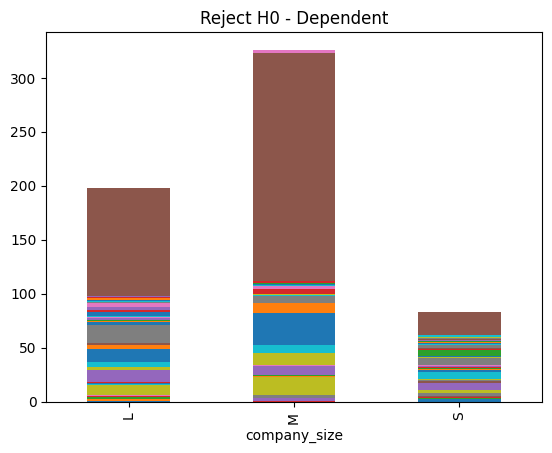

{'var1': 'company_size', 'var2': 'employee_residence', 'result': 'Reject H0 - Dependent'}
=====Analyze of company_location and company_size=====


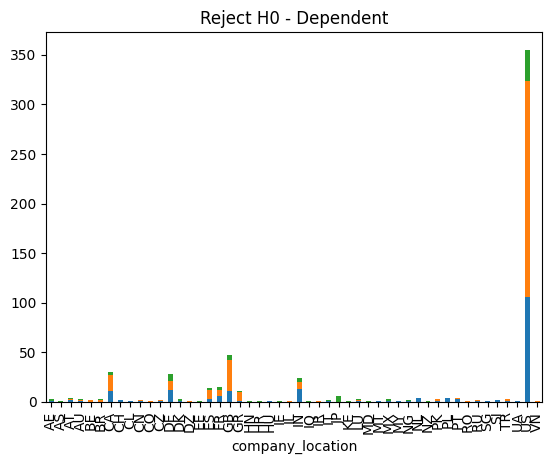

{'var1': 'company_location', 'var2': 'company_size', 'result': 'Reject H0 - Dependent'}


In [ ]:
chi_2=[]
for i in range(len(unique_pair_category)):
    var1, var2 = unique_pair_category[i]
    result=_analyzer.analyze_category_vs_category(var1, var2, df_input_category,prob=0.95)
    print(result)
    chi_2.append(result)

In [ ]:
pd.DataFrame(chi_2)

,var1,var2,result
0,employment_type,experience_level,Reject H0 - Dependent
1,job_title,experience_level,Reject H0 - Dependent
2,experience_level,salary_currency,Reject H0 - Dependent
3,experience_level,employee_residence,Reject H0 - Dependent
4,company_location,experience_level,Reject H0 - Dependent
5,company_size,experience_level,Reject H0 - Dependent
6,job_title,employment_type,Reject H0 - Dependent
7,employment_type,salary_currency,Fail to reject H0 - Independent
8,employment_type,employee_residence,Reject H0 - Dependent
9,company_location,employment_type,Reject H0 - Dependent


Nhan thay co nhieu bien phu thuoc lan nhau

##### Output numeric vs input numeric

In [ ]:
pd.concat([df_input_numeric, df_output], axis=1).corr()

,work_year,salary,remote_ratio,salary_in_usd
work_year,1.000000,-0.087577,0.076314,0.170493
salary,-0.087577,1.000000,-0.014608,-0.083906
remote_ratio,0.076314,-0.014608,1.000000,0.132122
salary_in_usd,0.170493,-0.083906,0.132122,1.000000


Nhan xet: cac bien `work_year` va `remote_ratio` co quan he voi `salary_in_usd`

##### Output numeric vs input category

In [ ]:
df_output_vs_df_input_category = pd.concat([df_input_category, df_output], axis=1)
df_output_vs_df_input_category.head()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size,salary_in_usd
0,MI,FT,Data Scientist,EUR,DE,DE,L,79833
1,SE,FT,Machine Learning Scientist,USD,JP,JP,S,260000
2,SE,FT,Big Data Engineer,GBP,GB,GB,M,109024
3,MI,FT,Product Data Analyst,USD,HN,HN,S,20000
4,SE,FT,Machine Learning Engineer,USD,US,US,L,150000


Var salary_in_usd vs experience_level:
                           sum_sq     df          F        PR(>F)
C(experience_level)  7.427705e+11    3.0  64.675515  2.881847e-36
Residual             2.308399e+12  603.0        NaN           NaN


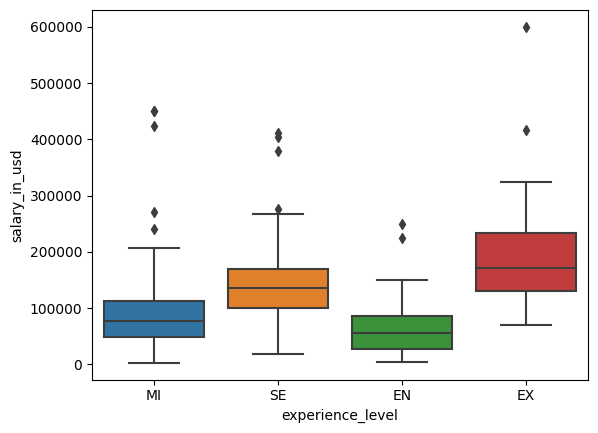

Var salary_in_usd vs employment_type:
                          sum_sq     df         F    PR(>F)
C(employment_type)  1.062317e+11    3.0  7.250605  0.000088
Residual            2.944937e+12  603.0       NaN       NaN


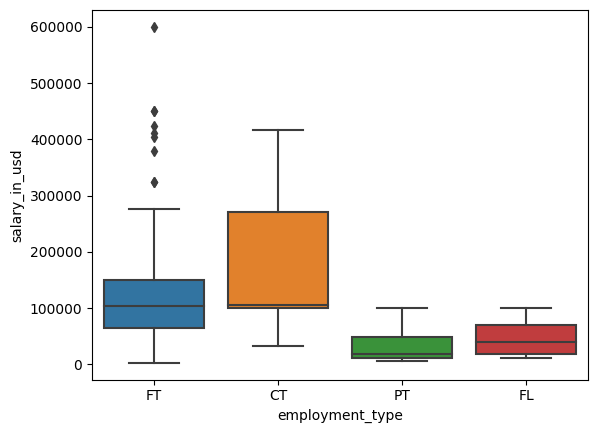

Var salary_in_usd vs job_title:
                    sum_sq     df         F        PR(>F)
C(job_title)  7.660926e+11   49.0  3.811006  6.894563e-15
Residual      2.285077e+12  557.0       NaN           NaN


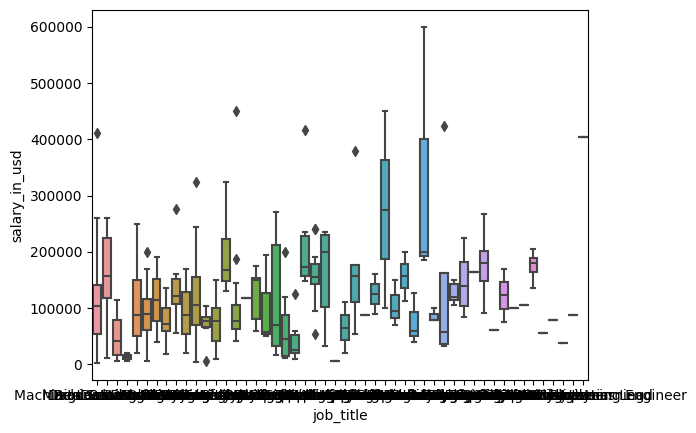

Var salary_in_usd vs salary_currency:
                          sum_sq     df          F        PR(>F)
C(salary_currency)  8.190003e+11   16.0  13.529727  4.116129e-31
Residual            2.232169e+12  590.0        NaN           NaN


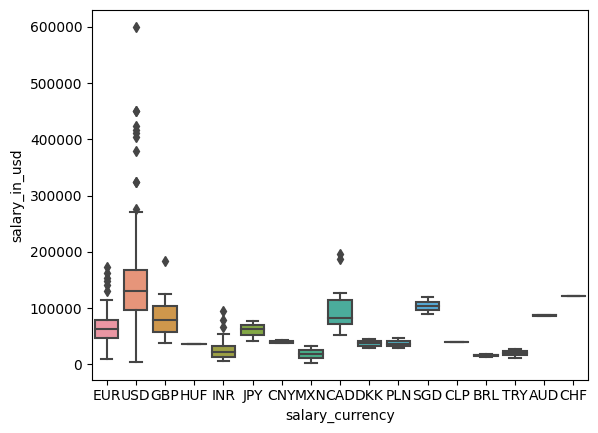

Var salary_in_usd vs employee_residence:
                             sum_sq     df       F        PR(>F)
C(employee_residence)  1.196812e+12   56.0  6.3388  1.059032e-32
Residual               1.854357e+12  550.0     NaN           NaN


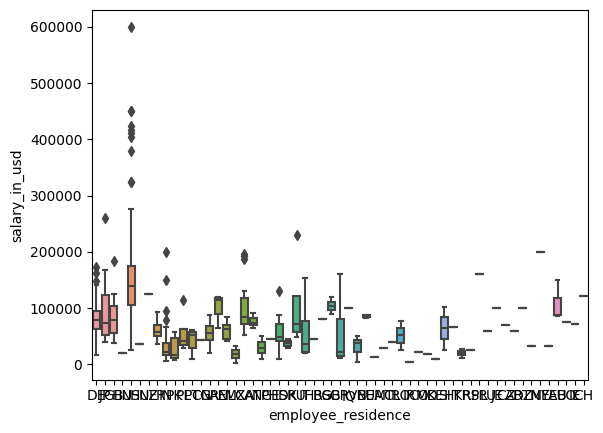

Var salary_in_usd vs company_location:
                           sum_sq     df         F        PR(>F)
C(company_location)  1.063172e+12   49.0  6.079207  1.942467e-28
Residual             1.987997e+12  557.0       NaN           NaN


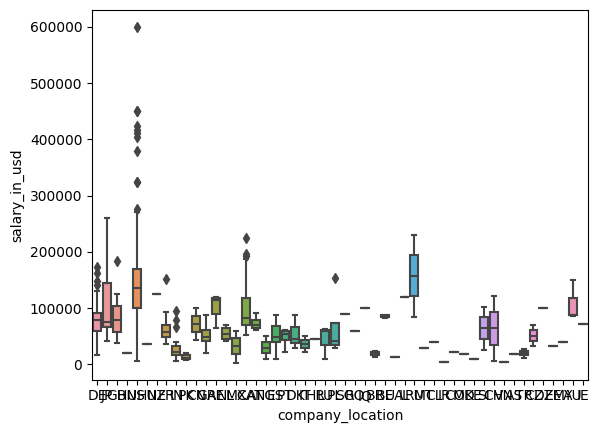

Var salary_in_usd vs company_size:
                       sum_sq     df          F    PR(>F)
C(company_size)  1.162105e+11    2.0  11.957777  0.000008
Residual         2.934959e+12  604.0        NaN       NaN


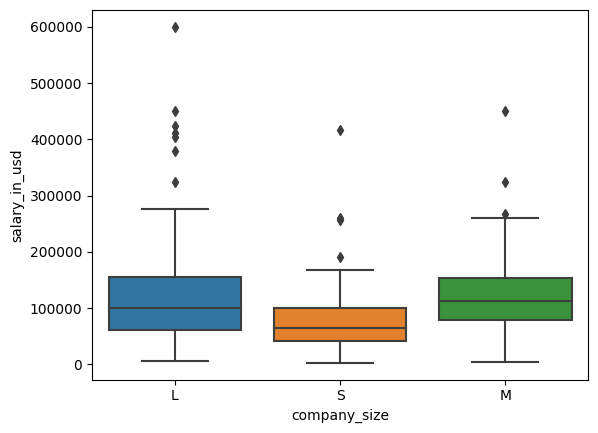

-----------------------------------------------
Var salary_in_usd vs {'employment_type', 'experience_level'}:
                                              sum_sq     df          F  \
C(employment_type)                      1.024853e+10    3.0   0.924329   
C(experience_level)                     6.772174e+11    3.0  61.079206   
C(employment_type):C(experience_level)  1.387613e+11    9.0   4.171693   
Residual                                2.199026e+12  595.0        NaN   

                                              PR(>F)  
C(employment_type)                      3.973664e-01  
C(experience_level)                     2.497567e-14  
C(employment_type):C(experience_level)  4.048492e-04  
Residual                                         NaN  


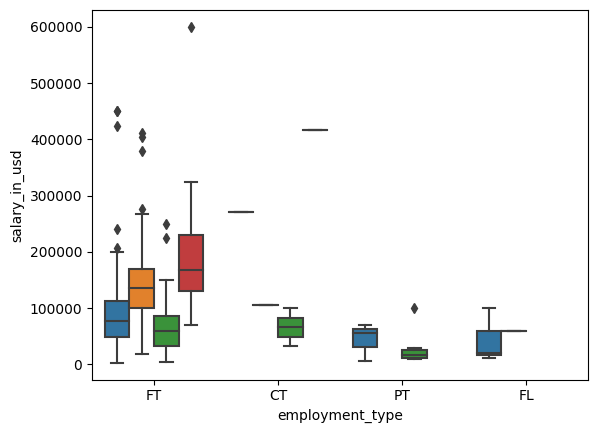

Var salary_in_usd vs {'job_title', 'experience_level'}:
                                        sum_sq     df          F        PR(>F)
C(job_title)                      2.655492e+12   49.0  20.585005  1.101050e-71
C(experience_level)              -2.333829e+09    3.0  -0.295495  1.000000e+00
C(job_title):C(experience_level)  2.170603e+12  147.0   5.608737  1.086424e-35
Residual                          1.321605e+12  502.0        NaN           NaN


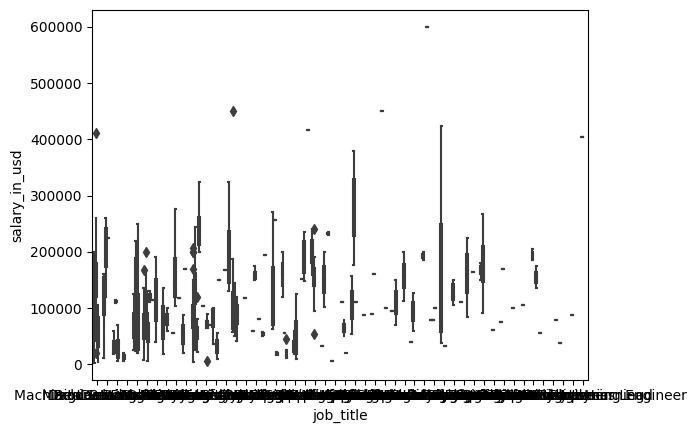

Var salary_in_usd vs {'experience_level', 'salary_currency'}:
                                              sum_sq     df          F  \
C(experience_level)                     3.079648e+09    3.0   0.331406   
C(salary_currency)                      1.594494e+12   16.0  32.172446   
C(experience_level):C(salary_currency)  7.853317e+11   48.0   5.281935   
Residual                                1.768703e+12  571.0        NaN   

                                              PR(>F)  
C(experience_level)                     8.026496e-01  
C(salary_currency)                      6.437770e-29  
C(experience_level):C(salary_currency)  1.927643e-15  
Residual                                         NaN  


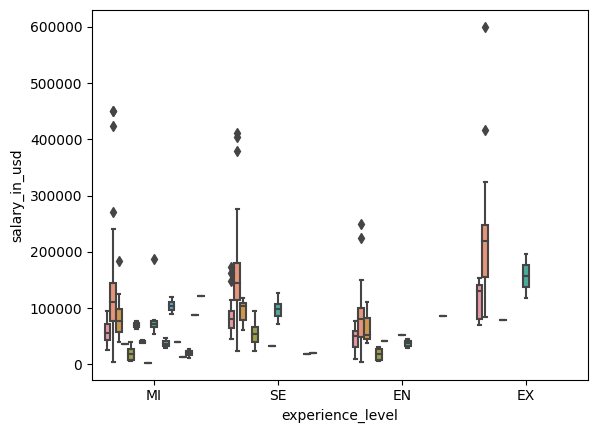

Var salary_in_usd vs {'experience_level', 'employee_residence'}:
                                                 sum_sq     df          F  \
C(experience_level)                        2.693534e+11    3.0  30.737254   
C(employee_residence)                      3.710229e+12   56.0  22.681750   
C(experience_level):C(employee_residence)  9.128196e+11  168.0   1.860114   
Residual                                   1.472199e+12  504.0        NaN   

                                                 PR(>F)  
C(experience_level)                        2.537530e-13  
C(employee_residence)                      2.727989e-40  
C(experience_level):C(employee_residence)  5.198941e-05  
Residual                                            NaN  


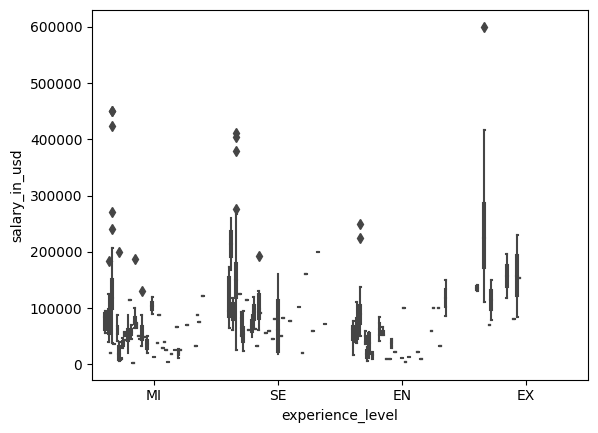

Var salary_in_usd vs {'company_location', 'experience_level'}:
                                               sum_sq     df             F  \
C(company_location)                      3.688488e+12   49.0  2.432813e+01   
C(experience_level)                      9.984633e+01    3.0  1.075641e-08   
C(company_location):C(experience_level)  8.969387e+11  147.0  1.971977e+00   
Residual                                 1.590401e+12  514.0           NaN   

                                               PR(>F)  
C(company_location)                      8.967742e-35  
C(experience_level)                      9.999173e-01  
C(company_location):C(experience_level)  3.228402e-05  
Residual                                          NaN  


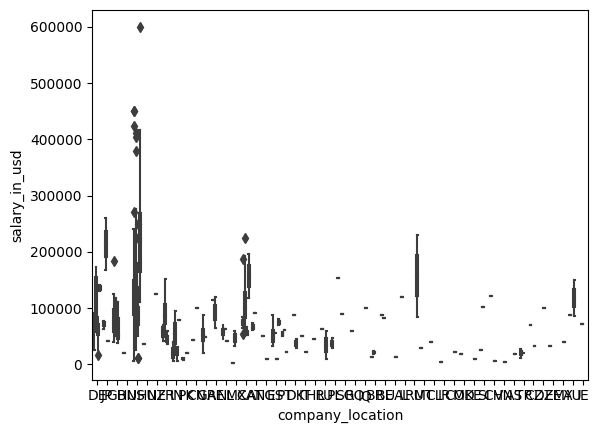

Var salary_in_usd vs {'company_size', 'experience_level'}:
                                           sum_sq     df          F  \
C(company_size)                      5.270050e+10    2.0   7.048472   
C(experience_level)                  6.792605e+11    3.0  60.565502   
C(company_size):C(experience_level)  3.132963e+10    6.0   1.396736   
Residual                             2.224369e+12  595.0        NaN   

                                           PR(>F)  
C(company_size)                      9.431640e-04  
C(experience_level)                  3.512985e-34  
C(company_size):C(experience_level)  2.135760e-01  
Residual                                      NaN  


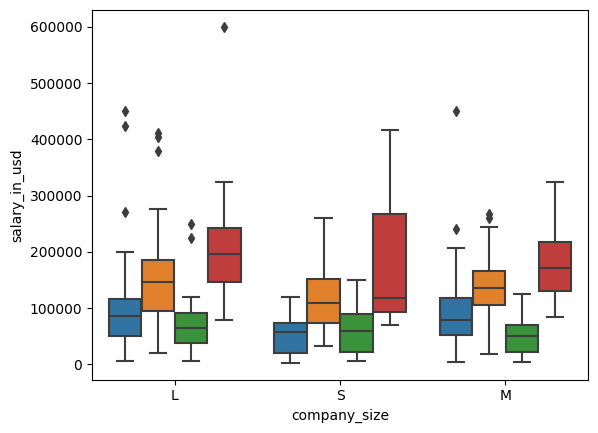

Var salary_in_usd vs {'job_title', 'employment_type'}:
                                       sum_sq     df          F        PR(>F)
C(job_title)                     3.550069e+12   49.0  18.484499  1.353151e-19
C(employment_type)                        NaN    3.0        NaN           NaN
C(job_title):C(employment_type)  1.971130e+12  147.0   3.421094  4.742913e-14
Residual                         2.128300e+12  543.0        NaN           NaN


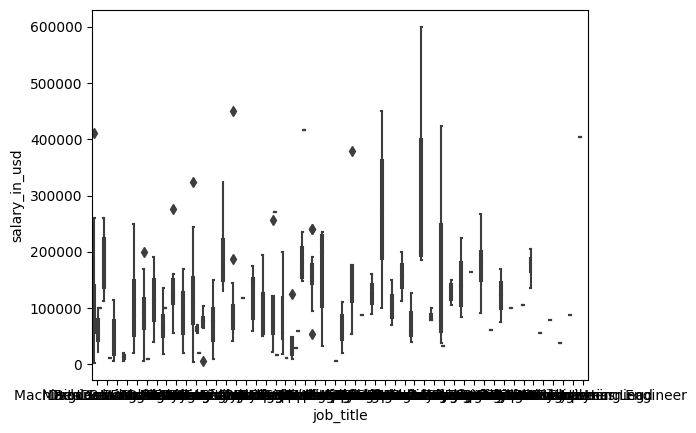

Var salary_in_usd vs {'employment_type', 'salary_currency'}:
                                             sum_sq     df          F  \
C(employment_type)                     5.177989e+10    3.0   4.710657   
C(salary_currency)                     1.873229e+12   16.0  31.953067   
C(employment_type):C(salary_currency)  4.432368e+11   48.0   2.520206   
Residual                               2.136127e+12  583.0        NaN   

                                             PR(>F)  
C(employment_type)                     2.938895e-03  
C(salary_currency)                     2.727207e-33  
C(employment_type):C(salary_currency)  2.266095e-04  
Residual                                        NaN  


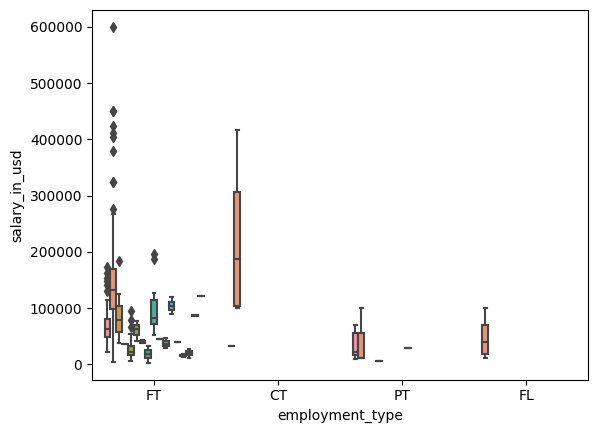

Var salary_in_usd vs {'employment_type', 'employee_residence'}:
                                                sum_sq     df          F  \
C(employment_type)                        1.415872e+10    3.0   1.399485   
C(employee_residence)                     4.579224e+12   56.0  24.247634   
C(employment_type):C(employee_residence)  6.024917e+11  168.0   1.063426   
Residual                                  1.810960e+12  537.0        NaN   

                                                PR(>F)  
C(employment_type)                        2.373332e-01  
C(employee_residence)                     2.212001e-43  
C(employment_type):C(employee_residence)  3.499702e-01  
Residual                                           NaN  


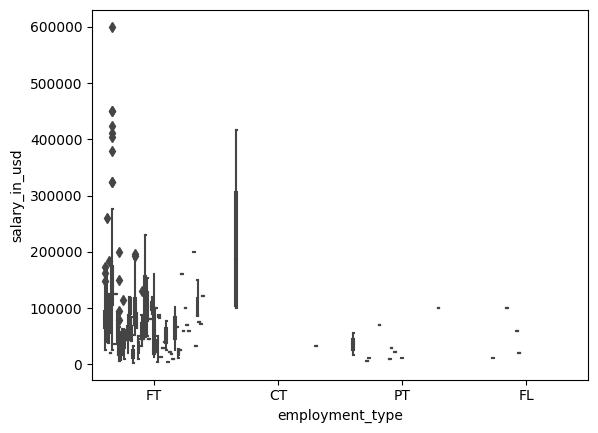

Var salary_in_usd vs {'company_location', 'employment_type'}:
                                              sum_sq     df          F  \
C(company_location)                     1.055447e+13   49.0  61.982623   
C(employment_type)                               NaN    3.0        NaN   
C(company_location):C(employment_type)  7.109580e+11  147.0   1.391734   
Residual                                1.897419e+12  546.0        NaN   

                                              PR(>F)  
C(company_location)                     3.537924e-43  
C(employment_type)                               NaN  
C(company_location):C(employment_type)  3.440879e-02  
Residual                                         NaN  


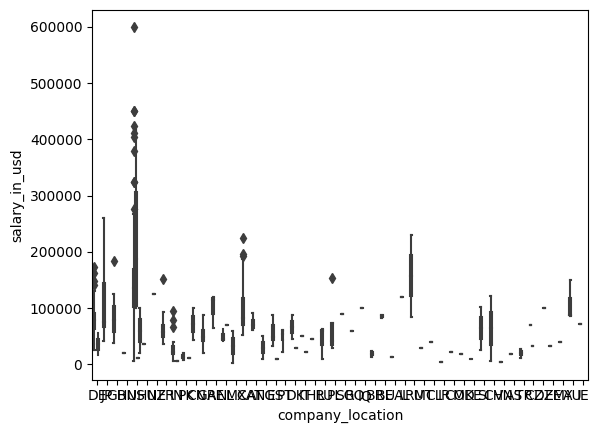

Var salary_in_usd vs {'company_size', 'employment_type'}:
                                          sum_sq     df          F    PR(>F)
C(company_size)                     1.001340e+11    2.0  10.873858  0.000023
C(employment_type)                  9.015516e+10    3.0   6.526819  0.000239
C(company_size):C(employment_type)  1.052190e+11    6.0   3.808686  0.000983
Residual                            2.739584e+12  595.0        NaN       NaN


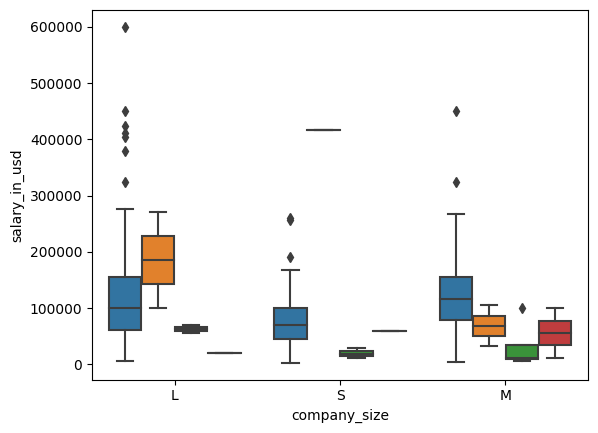

Var salary_in_usd vs {'job_title', 'salary_currency'}:
                                       sum_sq     df         F        PR(>F)
C(job_title)                     2.354015e+10   49.0  0.162207  9.999849e-01
C(salary_currency)              -3.390372e+07   16.0 -0.000715  1.000000e+00
C(job_title):C(salary_currency)  1.288530e+13  784.0  5.549255  1.080927e-41
Residual                         1.442357e+12  487.0       NaN           NaN


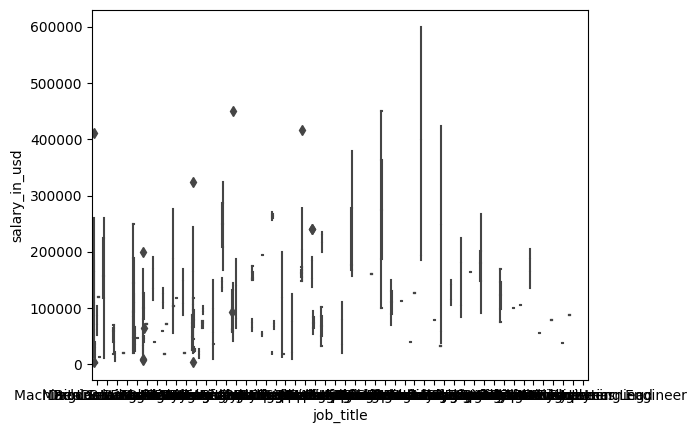

Var salary_in_usd vs {'job_title', 'employee_residence'}:
                                          sum_sq      df             F  \
C(job_title)                        1.524824e+04    49.0  1.313441e-07   
C(employee_residence)              -8.754488e+05    56.0 -6.598261e-06   
C(job_title):C(employee_residence)  2.809595e+13  2744.0  4.321618e+00   
Residual                            9.737670e+11   411.0           NaN   

                                          PR(>F)  
C(job_title)                        1.000000e+00  
C(employee_residence)               1.000000e+00  
C(job_title):C(employee_residence)  8.837976e-36  
Residual                                     NaN  


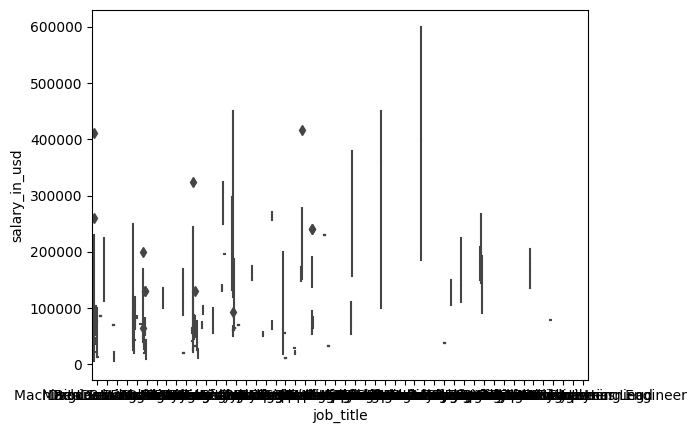

Var salary_in_usd vs {'job_title', 'company_location'}:
                                        sum_sq      df             F  \
C(job_title)                     -1.458804e+06    49.0 -1.051480e-05   
C(company_location)              -1.672537e+04    49.0 -1.205535e-07   
C(job_title):C(company_location)  2.377636e+13  2401.0  3.497465e+00   
Residual                          1.211835e+12   428.0           NaN   

                                        PR(>F)  
C(job_title)                      1.000000e+00  
C(company_location)               1.000000e+00  
C(job_title):C(company_location)  4.689540e-26  
Residual                                   NaN  


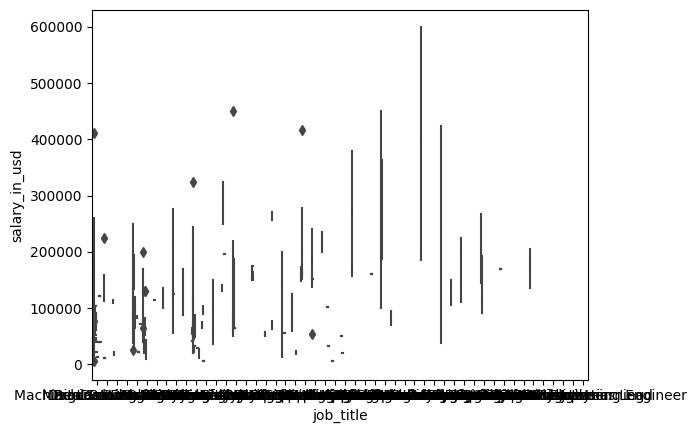

Var salary_in_usd vs {'job_title', 'company_size'}:
                                    sum_sq     df             F        PR(>F)
C(job_title)                  1.867913e+12   49.0  1.051139e+01  1.591687e-30
C(company_size)              -1.367656e-02    2.0 -1.885586e-12  1.000000e+00
C(job_title):C(company_size)  8.210548e+11   98.0  2.310178e+00  7.401632e-07
Residual                      1.845943e+12  509.0           NaN           NaN


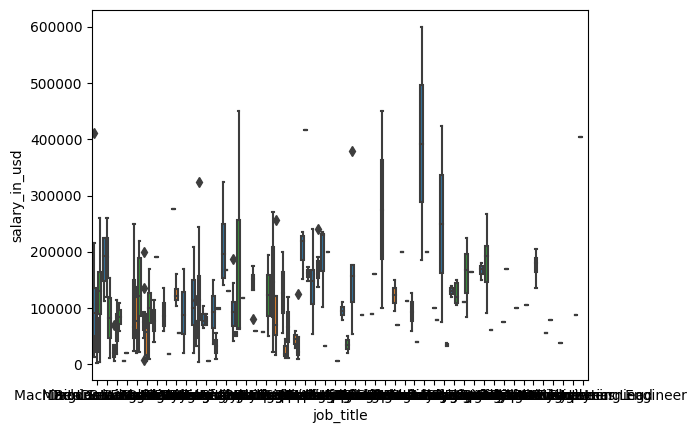

Var salary_in_usd vs {'employee_residence', 'salary_currency'}:
                                                sum_sq     df             F  \
C(employee_residence)                     1.004705e+03   56.0  5.336346e-09   
C(salary_currency)                        1.890778e+02   16.0  3.514909e-09   
C(employee_residence):C(salary_currency)  5.938538e+12  896.0  1.971356e+00   
Residual                                  1.798706e+12  535.0           NaN   

                                            PR(>F)  
C(employee_residence)                     1.000000  
C(salary_currency)                        1.000000  
C(employee_residence):C(salary_currency)  0.140278  
Residual                                       NaN  


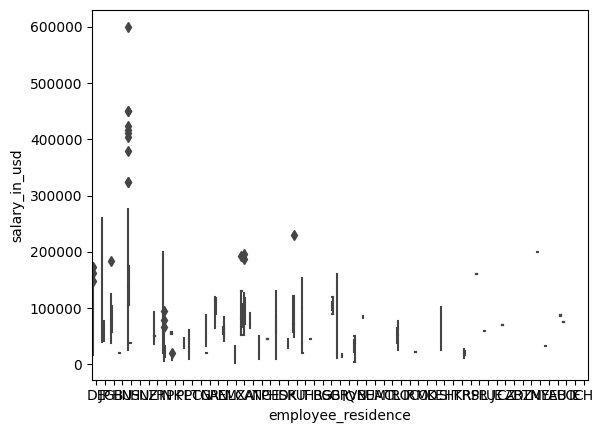

Var salary_in_usd vs {'company_location', 'salary_currency'}:
                                              sum_sq     df         F  \
C(company_location)                     1.831656e+09   49.0  0.010713   
C(salary_currency)                      8.797883e+07   16.0  0.001576   
C(company_location):C(salary_currency)  3.136480e+11  784.0  0.114650   
Residual                                1.863342e+12  534.0       NaN   

                                          PR(>F)  
C(company_location)                     1.000000  
C(salary_currency)                      1.000000  
C(company_location):C(salary_currency)  0.735044  
Residual                                     NaN  


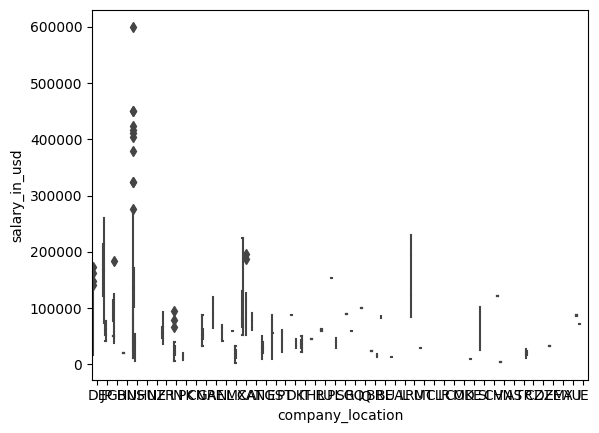

Var salary_in_usd vs {'company_size', 'salary_currency'}:
                                          sum_sq     df          F  \
C(company_size)                    -7.157976e+07    2.0  -0.009765   
C(salary_currency)                  2.090280e+12   16.0  35.644304   
C(company_size):C(salary_currency)  2.289452e+11   32.0   1.952033   
Residual                            2.107474e+12  575.0        NaN   

                                          PR(>F)  
C(company_size)                     1.000000e+00  
C(salary_currency)                  1.026212e-36  
C(company_size):C(salary_currency)  1.068397e-02  
Residual                                     NaN  


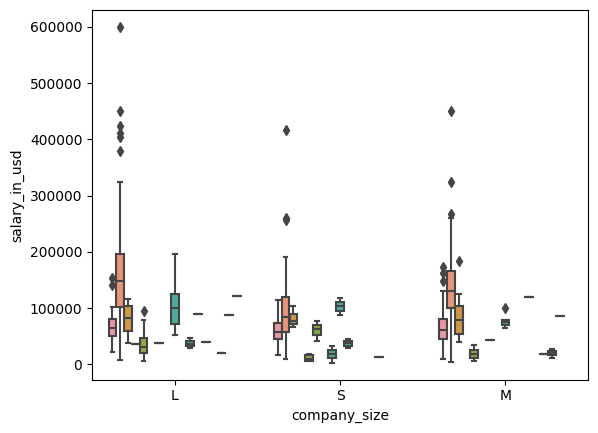

Var salary_in_usd vs {'company_location', 'employee_residence'}:
                                                 sum_sq      df         F  \
C(company_location)                        8.462704e+06    49.0  0.000050   
C(employee_residence)                     -3.050063e+06    56.0 -0.000016   
C(company_location):C(employee_residence)  3.943501e+13  2744.0  4.192719   
Residual                                   1.772118e+12   517.0       NaN   

                                                 PR(>F)  
C(company_location)                        9.999995e-01  
C(employee_residence)                      1.000000e+00  
C(company_location):C(employee_residence)  3.726085e-25  
Residual                                            NaN  


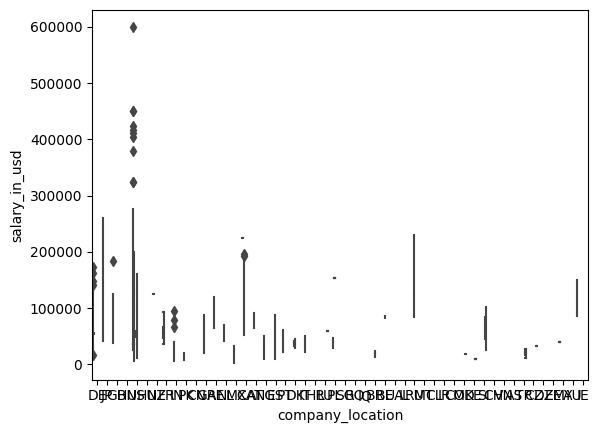

Var salary_in_usd vs {'company_size', 'employee_residence'}:
                                             sum_sq     df          F  \
C(company_size)                        3.478185e+08    2.0   0.051992   
C(employee_residence)                  2.861397e+12   56.0  15.275922   
C(company_size):C(employee_residence)  3.475682e+11  112.0   0.927768   
Residual                               1.729311e+12  517.0        NaN   

                                             PR(>F)  
C(company_size)                        8.197220e-01  
C(employee_residence)                  1.796119e-40  
C(company_size):C(employee_residence)  6.251633e-01  
Residual                                        NaN  


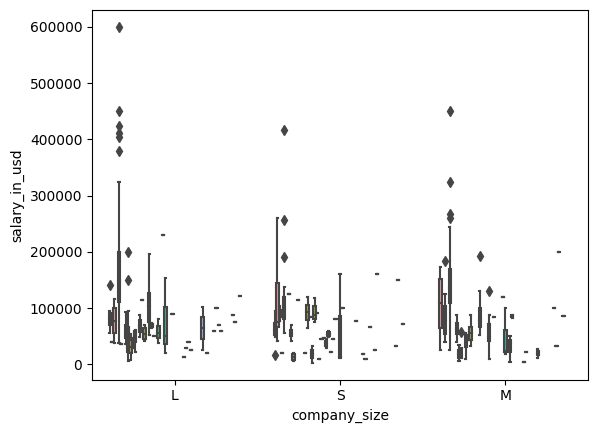

Var salary_in_usd vs {'company_location', 'company_size'}:
                                           sum_sq     df          F  \
C(company_location)                  2.333492e+12   49.0  13.368458   
C(company_size)                               NaN    2.0        NaN   
C(company_location):C(company_size)  2.779835e+11   98.0   0.796277   
Residual                             1.863076e+12  523.0        NaN   

                                           PR(>F)  
C(company_location)                  3.043714e-34  
C(company_size)                               NaN  
C(company_location):C(company_size)  8.427449e-01  
Residual                                      NaN  


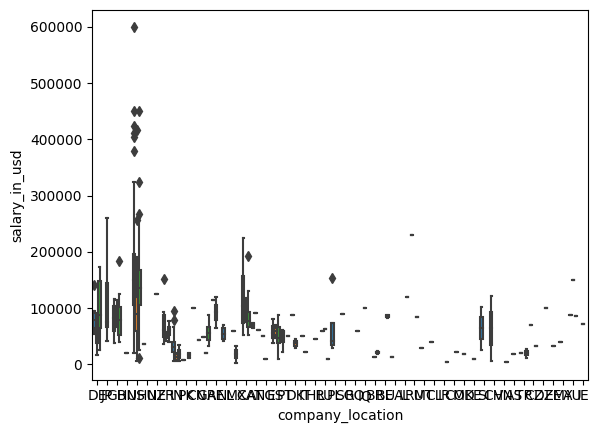

In [ ]:
for i in df_output_vs_df_input_category.drop(['salary_in_usd'], axis=1).columns:
    print(f'Var salary_in_usd vs {i}:')
    _analyzer.analyze_continous_vs_categories('salary_in_usd',i,df_output_vs_df_input_category)
print('-----------------------------------------------')
for j in range(len(unique_pair_category)):
    print(f'Var salary_in_usd vs {unique_pair_category[j]}:')
    _analyzer.analyze_continous_vs_categories('salary_in_usd',list(unique_pair_category[j]),df_output_vs_df_input_category)


#### 3. Remove outliers

In [ ]:
# do outliers nam o output nen ta giu nguyen, dong thoi, cac outliers the hien salary nen co the mang y nghia 1 vai ca nhan co tien luong cao hon han hoac thap hon han phan con lai

#### 4. Data Standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [ ]:
df_input.reset_index(drop=True, inplace=True)
df_input.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,US,50,US,L


In [ ]:
scaler = RobustScaler()

In [ ]:
df_scale_robust = pd.DataFrame(scaler.fit_transform(df_input[df_input_numeric.columns.to_list()]),
                                columns=df_input_numeric.columns.to_list()).add_prefix('scaled ')

In [ ]:
df_scale_robust.head()

,scaled work_year,scaled salary,scaled remote_ratio
0,-2.0,-0.473684,-2.0
1,-2.0,1.526316,-2.0
2,-2.0,-0.315789,-1.0
3,-2.0,-1.000000,-2.0
4,-2.0,0.368421,-1.0


In [ ]:
df_input = pd.concat([df_input,df_scale_robust], axis=1)
df_input.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size,scaled work_year,scaled salary,scaled remote_ratio
0,2020,MI,FT,Data Scientist,70000,EUR,DE,0,DE,L,-2.0,-0.473684,-2.0
1,2020,SE,FT,Machine Learning Scientist,260000,USD,JP,0,JP,S,-2.0,1.526316,-2.0
2,2020,SE,FT,Big Data Engineer,85000,GBP,GB,50,GB,M,-2.0,-0.315789,-1.0
3,2020,MI,FT,Product Data Analyst,20000,USD,HN,0,HN,S,-2.0,-1.000000,-2.0
4,2020,SE,FT,Machine Learning Engineer,150000,USD,US,50,US,L,-2.0,0.368421,-1.0


#### 5. Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
for i in df_input_category.columns.to_list():
    encoded = encoder.fit_transform(df_input[i])
    df_input[f'encoded_{i}'] = encoded

In [ ]:
df_input.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size,scaled work_year,scaled salary,scaled remote_ratio,encoded_experience_level,encoded_employment_type,encoded_job_title,encoded_salary_currency,encoded_employee_residence,encoded_company_location,encoded_company_size
0,2020,MI,FT,Data Scientist,70000,EUR,DE,0,DE,L,-2.0,-0.473684,-2.0,2,2,22,7,14,12,0
1,2020,SE,FT,Machine Learning Scientist,260000,USD,JP,0,JP,S,-2.0,1.526316,-2.0,3,2,41,16,32,29,2
2,2020,SE,FT,Big Data Engineer,85000,GBP,GB,50,GB,M,-2.0,-0.315789,-1.0,3,2,7,8,20,18,1
3,2020,MI,FT,Product Data Analyst,20000,USD,HN,0,HN,S,-2.0,-1.000000,-2.0,2,2,47,16,23,20,2
4,2020,SE,FT,Machine Learning Engineer,150000,USD,US,50,US,L,-2.0,0.368421,-1.0,3,2,38,16,55,48,0


#### 6. Resample & Finding important feature

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df_input.columns.to_list()

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size',
 'scaled work_year',
 'scaled salary',
 'scaled remote_ratio',
 'encoded_experience_level',
 'encoded_employment_type',
 'encoded_job_title',
 'encoded_salary_currency',
 'encoded_employee_residence',
 'encoded_company_location',
 'encoded_company_size']

In [ ]:
X = df_input[['scaled work_year','scaled salary','scaled remote_ratio',
            'encoded_experience_level','encoded_employment_type',
            'encoded_job_title','encoded_salary_currency',
            'encoded_employee_residence','encoded_company_location',
            'encoded_company_size']] 
y = df_output

In [ ]:
clf = RandomForestRegressor(n_estimators=250)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 431159863.8944328


In [ ]:
print("R^2 score: ",clf.score(X,y))
print("Training score: ",clf.score(X_train,y_train))
print("Testing score: ",clf.score(X_test,y_test))

R^2 score:  0.9659206780012431
Training score:  0.988396472880223
Testing score:  0.911178377803889


In [ ]:
# model co score tuong doi cao

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index = np.array(X.columns)).sort_values(ascending=False)
feature_imp

scaled salary                 0.771779
encoded_salary_currency       0.154862
encoded_employee_residence    0.053196
encoded_company_location      0.008531
encoded_job_title             0.006029
encoded_experience_level      0.001705
scaled work_year              0.001232
encoded_company_size          0.001071
scaled remote_ratio           0.000971
encoded_employment_type       0.000624
dtype: float64

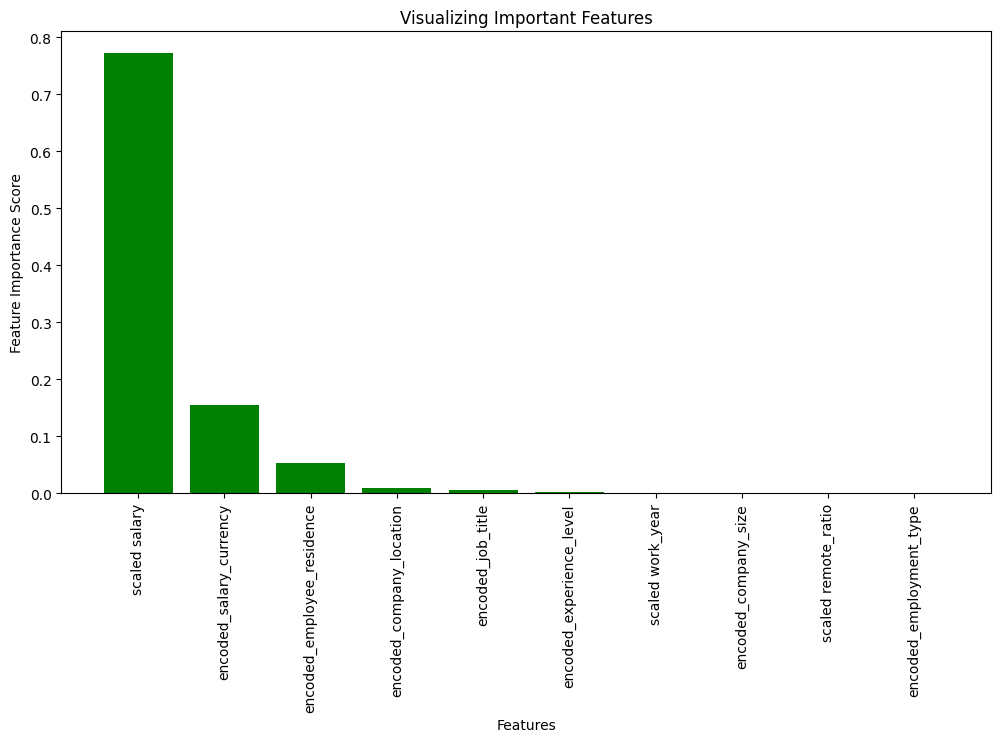

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(feature_imp.index, feature_imp, color="g")
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.xticks(rotation = "vertical")
plt.show()

In [ ]:
feature_imp_select = feature_imp[feature_imp >0.001]
feature_imp_select

scaled salary                 0.771779
encoded_salary_currency       0.154862
encoded_employee_residence    0.053196
encoded_company_location      0.008531
encoded_job_title             0.006029
encoded_experience_level      0.001705
scaled work_year              0.001232
encoded_company_size          0.001071
dtype: float64

In [ ]:
X1 = df_input[feature_imp_select.index]
y1 = df_output

#### 6. Build model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [ ]:
pipe = Pipeline([ 
('ros', RandomOverSampler()),
('oversampler', SMOTE()),
])

In [ ]:
X_resample, y_resample = pipe.fit_resample(X_train, y_train)

In [ ]:
regressors = [    
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [ ]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_resample, y_resample)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

GradientBoostingRegressor()
	Training time: 0.235s
	Prediction time: 0.003s
	Explained variance: 0.9426763361469624
	Mean absolute error: 8782.260224313175
	R2 score: 0.9421429321545078

KNeighborsRegressor()
	Training time: 0.010s
	Prediction time: 0.004s
	Explained variance: 0.6731541416629787
	Mean absolute error: 25948.263387978142
	R2 score: 0.6706892461572307

ExtraTreesRegressor()
	Training time: 0.432s
	Prediction time: 0.025s
	Explained variance: 0.8745266040382662
	Mean absolute error: 11112.21737704918
	R2 score: 0.8729320228775214

RandomForestRegressor()
	Training time: 0.624s
	Prediction time: 0.023s
	Explained variance: 0.8870045114042189
	Mean absolute error: 7937.831967213115
	R2 score: 0.8857593288898823

DecisionTreeRegressor()
	Training time: 0.008s
	Prediction time: 0.003s
	Explained variance: 0.8208548475721036
	Mean absolute error: 9451.377049180328
	R2 score: 0.8177549067187126

LinearRegression()
	Training time: 0.005s
	Prediction time: 0.001s
	Explained varian

Nhan xet: Dua vao cac thong so => lua chon GradientBoostingRegressor()

In [ ]:
# tunning on GradientBoostingRegressor
parameters = { 'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'mse', 'mae'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [ ]:
grid = GridSearchCV(GradientBoostingRegressor(),parameters)
model = grid.fit(X_resample,y_resample)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'criterion': 'mse', 'learning_rate': 0.5, 'loss': 'ls', 'max_features': 'auto'} 

GradientBoostingRegressor(criterion='mse', learning_rate=0.5, loss='ls',
                          max_features='auto') 



In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# train score
model.score(X_resample, y_resample)

0.9997594502124553

In [ ]:
# test score
model.score(X_test, y_test)

0.9422812418104016

In [ ]:
print('R2 score: ', r2_score(y_test,y_pred))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

R2 score:  0.9422812418104016
Mean absolute error: 8489.411819328183
MSE:  345754888.0029928


In [ ]:
plotDa = pd.DataFrame({'y_test':y_test.values.flatten(),'y_pred':y_pred})
plotDa


,y_test,y_pred
0,153000,149848.698517
1,126500,128066.176278
2,118000,117637.239539
3,82528,83604.642191
4,54957,56594.449904
...,...,...
178,40038,79045.668239
179,250000,265331.866322
180,150260,148812.182731
181,256000,257666.595509


<AxesSubplot:xlabel='y_test', ylabel='y_pred'>

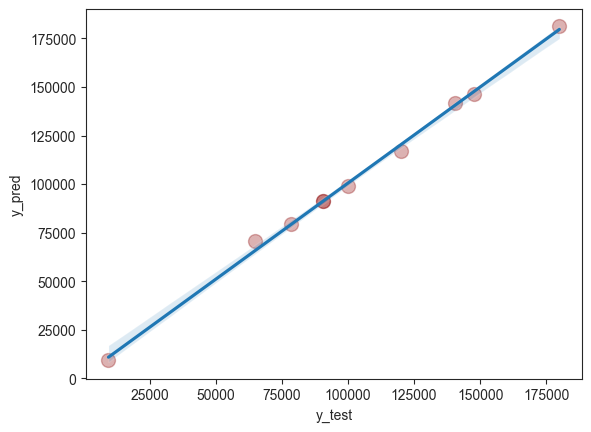

In [ ]:
sns.set_style('ticks')
sns.regplot(x='y_test',y='y_pred', data=plotDa.sample(10), fit_reg=True, scatter_kws={'color': 'darkred', 'alpha': 0.3, 's': 100})

Nhan xet: model cho score cao, va cac chi so deu hop ly => model hop ly